# Data Visualization - Practice Notebook 

## Import datasets and libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
# Load example dataset
google_playstore_data = pd.read_csv('googleplaystore.csv')

In [5]:
google_playstore_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Inspect the data types of the example dataset
google_playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
# Load practice dataset
energy_performance_data = pd.read_csv('energy_noisy_train.csv').iloc[:,1:]

In [12]:
energy_performance_data.head(5)

,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Location,surface_area_categories,wall_description,energxe
0,0.71,220.5,3.5,5,0.10,4.407175,10.72,Mountain,High Surface Area,The wall colour is green and the area is 269.5...,571.0
1,0.62,220.5,3.5,3,0.10,3.725392,12.74,City,Very High Surface Area,The wall colour is indigo and the area is 367....,NaN
2,0.82,147.0,7.0,4,0.25,1.530090,25.38,Countryside,Low Surface Area,The wall colour is orange and the area is 318....,NaN
3,0.74,220.5,3.5,5,0.25,2.007144,12.30,City,Average Surface Area,The wall colour is orange and the area is 245....,395.0
4,0.76,122.5,7.0,5,0.40,1.649852,40.43,Seaside,Average Surface Area,The wall colour is indigo and the area is 416....,NaN


## View distributions of variables by creating histograms and density plots



Sample histogram on example dataset

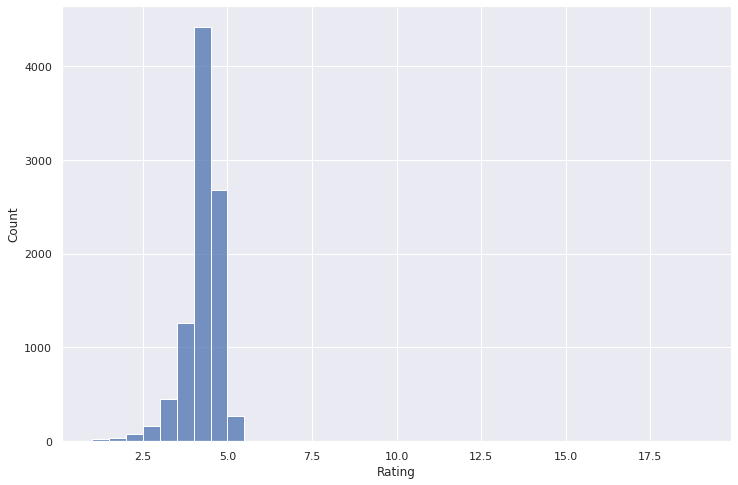

In [11]:
# set figure size
sns.set(rc={'figure.figsize':(12,8)})
# Plot a histogram in seaborn to view the distribution of app ratings in the dataset
sns.histplot(data=google_playstore_data, x="Rating", binwidth=0.5)

### Practice: Examine the distribution of Roof Area using a histogram

In [12]:
# Examine the distribution of Roof Area using seaborn.histplot


Sample density plot on example dataset

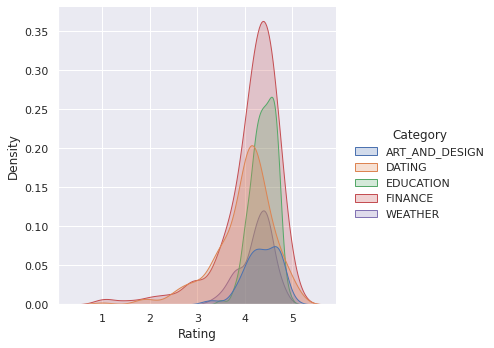

In [ ]:
# Create a density plot for the ratings received by apps belonging to 5 categories
select_categories = google_playstore_data[google_playstore_data['Category'].isin(['ART_AND_DESIGN', 'EDUCATION', 'DATING', 'WEATHER', 'FINANCE'])]
sns.displot(data=select_categories, x="Rating", hue ='Category', kind="kde", fill = True)

### Practice: Examine the distribution of Glazing Area Distribution for houses located in mountainous regions

In [13]:
# select rows with location = Mountain

# Create the distribution plot and examine the distribution of Glazing Area


## Explore the relationship between numerical variables using scatterplots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


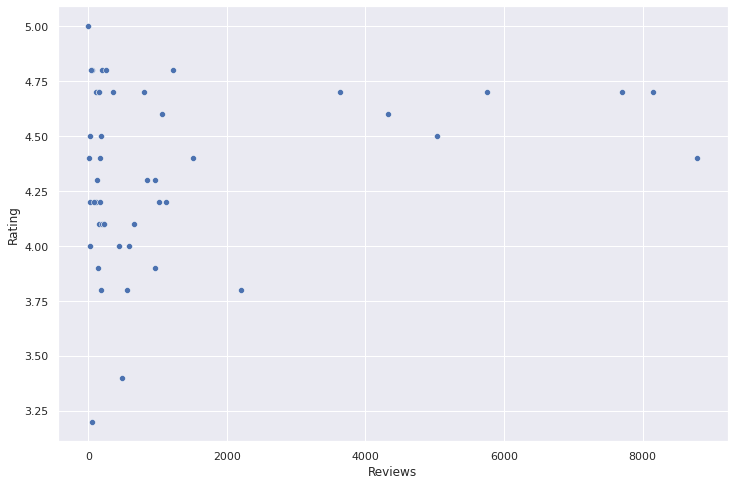

In [ ]:
# Create a scatterplot of ratings vs reviews for art and design apps
art_and_design_apps = google_playstore_data[google_playstore_data['Category'].isin(['ART_AND_DESIGN'])]
art_and_design_apps["Reviews"] = art_and_design_apps["Reviews"].astype(int)
art_and_design_apps= art_and_design_apps[art_and_design_apps["Reviews"]<=10000]
sns.scatterplot(data=art_and_design_apps, x="Reviews", y="Rating")

### Practice: Create multiple scatterplots between Heating Load and the other numerical variables in the dataset

Hint: Use `seaborn.pairplot` : https://seaborn.pydata.org/generated/seaborn.pairplot.html. Also, try removing outliers and recreating the scatterplots. 

## Explore the relationship between numerical and categorical variables using box-plots or violin plots

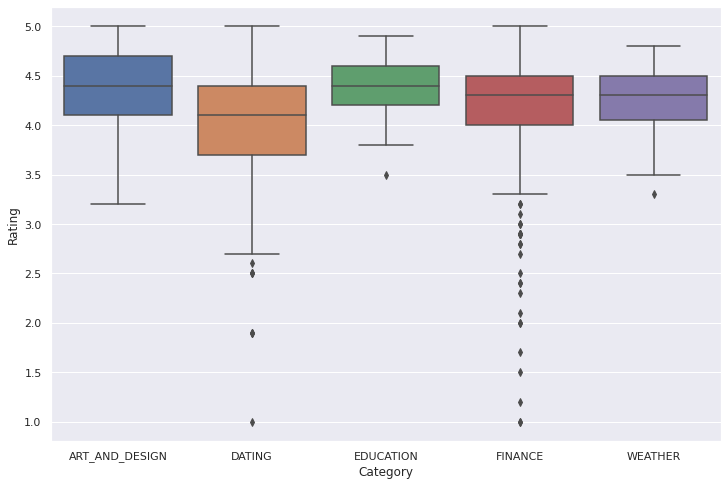

In [ ]:
# Create a boxplot to show the distribution of ratings for apps belonging to five selected categories
sns.boxplot(x="Category", y="Rating", data=select_categories)

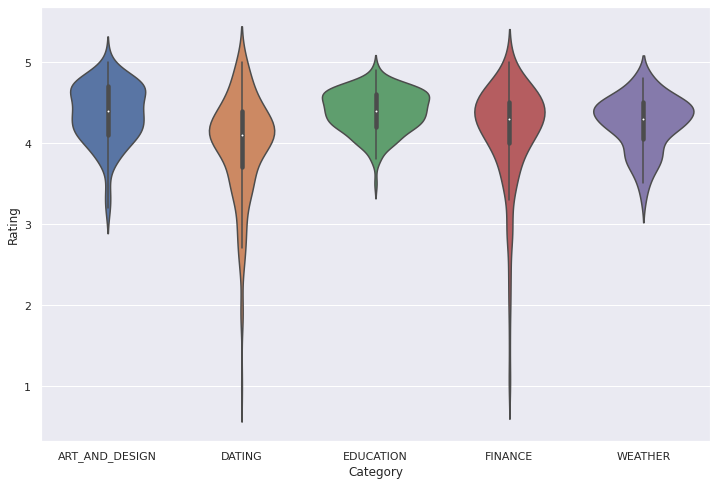

In [ ]:
# Create a violin plot and compare with the box-plot from above
sns.violinplot(x="Category", y="Rating", data=select_categories)

### Practice: Create box or violin plots to show the distribution of 'Heating Load' for houses in different locations

In [14]:
# View the different location categories in the energy performance data


In [15]:
# Filter out rows with location = nan or 177


In [16]:
# Create a violin plot to show the distribution of 'Heating Load' for houses in different locations


## Create bar plot to display summary statistics for different categories

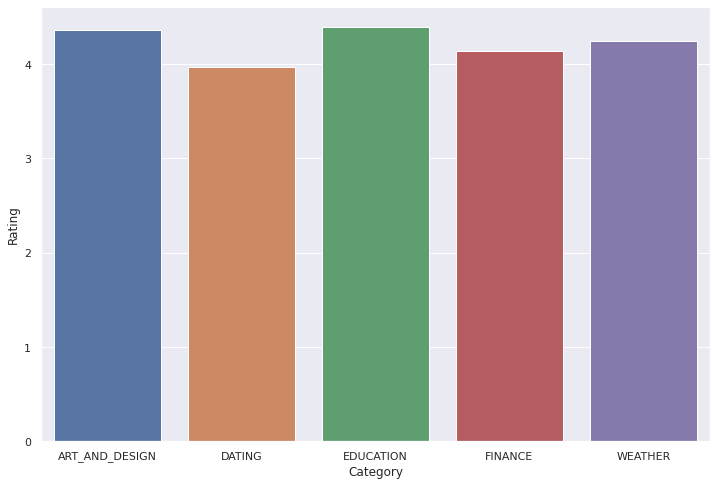

In [ ]:
# Create a bar-plot to show the average rating received by apps in each of a few selected categories
select_categories_average_rating  = select_categories.groupby(by =['Category']).mean().reset_index()
ax=sns.barplot(x="Category", y="Rating", data=select_categories_average_rating)

### Practice: Create a bar plot to display the average heating load for houses in different locations

In [16]:
# Calculate the average heating load for houses in different locations (Hint: use pandas.DataFrame.groupby)

# Create a bar-plot to display the average heating load for houses in different locations
